# Documentation

The following annotation method is inpired from this code: https://github.com/manikanthp/LayoutLMV3_Fine_Tuning




This annotation procedure combines automated OCR-based data preparation with the precision of manual annotation in Label Studio, ensuring a smooth transition for creating high-quality labeled datasets.

**The Annotation Procedure is Splitetd in 3 Parts.**

**Annotation Procedure - Part 1: JSON File Preparation**

This part will provide details for creating a JSON file that contains the OCR engine's results to integrate into the Label Studio platform.

**Annotation Procedure - Part 2: Integration with Label Studio**

This part will provide details for the integration of the JSON file into the Label Studio platform.

**Annotation Procedure - Part 3: Annotating with Label Studio**

This section will guide through the process of performing annotations using the Label Studio interface.

# Annotation Procedure - Part 1: JSON File Preparation

## Installing Libraries

In [ ]:
! pip install paddlepaddle
! pip install paddleocr
! pip install paddleclas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/60.9 MB 27.2 MB/s eta 0:00:02

## Seting the Working Directory

In [ ]:
import os

# set the working directory (this version is created for Google Colab)
my_wd = "/content"
os.chdir(my_wd)
print("Changed working directory to:", os.getcwd())

Changed working directory to: /content


## Mounting Google Drive

In [ ]:
from google.colab import drive

# mount google drive
drive.mount(os.path.join(my_wd,"drive"))

Mounted at /content/drive


## Loading & Unzipping the Folder Conating our 180 Invoices

In [ ]:
# define the google drive location
zip_file_name = "drive/your_path.zip"

# create the final path
zip_file_path = os.path.join(my_wd, zip_file_name)

# keep the name of the zipped folder
zip_basename = os.path.splitext(os.path.basename(zip_file_name))[0]

# unzip the folder
!unzip -q "{zip_file_path}" -d "{zip_basename}"

## Loading PaddleOCR Engine

In [ ]:
from paddleocr import PaddleOCR

# load the OCR engine
ocr = PaddleOCR(use_angle_cls=False,
                lang='en',
                  rec=False,
                )

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 236kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:11<00:00, 891kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 146kiB/s]

[2024/02/13 19:00:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

## Preparing JSON file for Label Studio

### Defining the Folder Containing our Data

In [ ]:
# define the folder with the data
images_folder_path  = os.path.join(my_wd,"your_path")

### Creating JSON file Containing the Bounding Boxes and the Extracted Text Using Paddle OCR

`create_image_url` function:

This function takes a filename as an argument and returns a formatted URL string.
It assumes that the images are served locally and the image URLs are formed with the pattern: http://localhost:8080/{filename}

`extracted_tables_to_label_studio_json_file_with_paddleOCR` function:

This function processes images in a specified folder.
For each image, it performs OCR using PaddleOCR.
It then converts the OCR results into a format suitable for Label Studio.
The OCR results include bounding box coordinates and corresponding text for each detected region in the image.
The results are transformed into a JSON format that can be used as input for Label Studio.
The resulting JSON is saved to a file named 'TC_label-studio_input_file.json'.

In [ ]:
import os
from uuid import uuid4
from PIL import Image
import json
import numpy as np

# define a function to create image urls for label studio
def create_image_url(filename):
    return f'http://localhost:8080/{filename}'


In [ ]:
from tqdm import tqdm

# main function for processing images with paddleocr and converting results to label studio format
def extracted_tables_to_label_studio_json_file_with_paddleocr(images_folder_path):
    label_studio_task_list = []

    # iterate through each image in the specified folder
    for image_filename in tqdm(os.listdir(images_folder_path), desc="Processing Images"):
        if image_filename.endswith('.png'):
            output_json = {}
            annotation_result = []

            # add image data to the output json
            output_json['data'] = {"ocr": create_image_url(image_filename)}

            # open the image and convert it to a numpy array
            img = Image.open(f'{images_folder_path}/{image_filename}')
            img = np.asarray(img)
            image_height, image_width = img.shape[:2]

            # perform ocr on the image using paddleocr
            result = ocr.ocr(img, cls=False)

            # process ocr results and convert to label studio format
            for output in result:
                for item in output:
                    co_ord = item[0]
                    text = item[1][0]
                    four_co_ord = [co_ord[0][0], co_ord[1][1], co_ord[2][0] - co_ord[0][0], co_ord[2][1] - co_ord[1][1]]

                    # convert bounding box coordinates to label studio format
                    bbox = {
                        'x': 100 * four_co_ord[0] / image_width,
                        'y': 100 * four_co_ord[1] / image_height,
                        'width': 100 * four_co_ord[2] / image_width,
                        'height': 100 * four_co_ord[3] / image_height,
                        'rotation': 0
                    }

                    # skip empty text
                    if not text:
                        continue

                    # generate a unique region id and set the score
                    region_id = str(uuid4())[:10]
                    score = 0.5

                    # create label studio format for bounding box and transcription
                    bbox_result = {
                        'id': region_id, 'from_name': 'bbox', 'to_name': 'image', 'type': 'rectangle',
                        'value': bbox
                    }
                    transcription_result = {
                        'id': region_id, 'from_name': 'transcription', 'to_name': 'image', 'type': 'textarea',
                        'value': dict(text=[text], **bbox), 'score': score
                    }

                    # extend the annotation result list with the bounding box and transcription results
                    annotation_result.extend([bbox_result, transcription_result])

            # add the processed results to the output json
            output_json['predictions'] = [{"result": annotation_result, "score": 0.97}]

            # append the output json to the list of label studio tasks
            label_studio_task_list.append(output_json)

    # save the list of label studio tasks as a json file for import
    with open('TC_label-studio_input_file.json', 'w') as f:
        json.dump(label_studio_task_list, f, indent=4)

### Utilizing the Function

In [ ]:
extracted_tables_to_label_studio_json_file_with_paddleocr(images_folder_path)

Processing Images:   0%|          | 0/180 [00:00<?, ?it/s]

[2024/02/10 12:10:28] ppocr DEBUG: dt_boxes num : 37, elapsed : 1.8443148136138916
[2024/02/10 12:10:32] ppocr DEBUG: rec_res num  : 37, elapsed : 3.993698835372925


Processing Images:   1%|          | 1/180 [00:05<17:48,  5.97s/it]

[2024/02/10 12:10:33] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.25220823287963867
[2024/02/10 12:10:35] ppocr DEBUG: rec_res num  : 20, elapsed : 2.2106916904449463


Processing Images:   1%|          | 2/180 [00:08<11:37,  3.92s/it]

[2024/02/10 12:10:35] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.2837638854980469
[2024/02/10 12:10:39] ppocr DEBUG: rec_res num  : 35, elapsed : 3.8546478748321533


Processing Images:   2%|▏         | 3/180 [00:12<11:53,  4.03s/it]

[2024/02/10 12:10:39] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.2715485095977783
[2024/02/10 12:10:43] ppocr DEBUG: rec_res num  : 21, elapsed : 3.3490655422210693


Processing Images:   2%|▏         | 4/180 [00:16<11:22,  3.88s/it]

[2024/02/10 12:10:43] ppocr DEBUG: dt_boxes num : 44, elapsed : 0.4153592586517334
[2024/02/10 12:10:52] ppocr DEBUG: rec_res num  : 44, elapsed : 8.967437028884888


Processing Images:   3%|▎         | 5/180 [00:25<17:08,  5.87s/it]

[2024/02/10 12:10:52] ppocr DEBUG: dt_boxes num : 40, elapsed : 0.31049084663391113
[2024/02/10 12:10:57] ppocr DEBUG: rec_res num  : 40, elapsed : 4.82560658454895


Processing Images:   3%|▎         | 6/180 [00:30<16:20,  5.63s/it]

[2024/02/10 12:10:58] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.43808674812316895
[2024/02/10 12:11:02] ppocr DEBUG: rec_res num  : 35, elapsed : 3.8627707958221436


Processing Images:   4%|▍         | 7/180 [00:35<15:01,  5.21s/it]

[2024/02/10 12:11:02] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.5267596244812012
[2024/02/10 12:11:06] ppocr DEBUG: rec_res num  : 25, elapsed : 3.623229503631592


Processing Images:   4%|▍         | 8/180 [00:39<13:59,  4.88s/it]

[2024/02/10 12:11:06] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2925560474395752
[2024/02/10 12:11:08] ppocr DEBUG: rec_res num  : 17, elapsed : 1.7801175117492676


Processing Images:   5%|▌         | 9/180 [00:41<11:25,  4.01s/it]

[2024/02/10 12:11:08] ppocr DEBUG: dt_boxes num : 27, elapsed : 0.3011753559112549
[2024/02/10 12:11:13] ppocr DEBUG: rec_res num  : 27, elapsed : 4.769524097442627


Processing Images:   6%|▌         | 10/180 [00:46<12:18,  4.35s/it]

[2024/02/10 12:11:13] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3030550479888916
[2024/02/10 12:11:18] ppocr DEBUG: rec_res num  : 68, elapsed : 4.204634189605713


Processing Images:   6%|▌         | 11/180 [00:51<12:27,  4.42s/it]

[2024/02/10 12:11:18] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.2703423500061035
[2024/02/10 12:11:19] ppocr DEBUG: rec_res num  : 15, elapsed : 1.4993009567260742


Processing Images:   7%|▋         | 12/180 [00:52<10:08,  3.62s/it]

[2024/02/10 12:11:20] ppocr DEBUG: dt_boxes num : 48, elapsed : 0.28137874603271484
[2024/02/10 12:11:25] ppocr DEBUG: rec_res num  : 48, elapsed : 5.100209474563599


Processing Images:   7%|▋         | 13/180 [00:58<11:35,  4.16s/it]

[2024/02/10 12:11:25] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.40857791900634766
[2024/02/10 12:11:27] ppocr DEBUG: rec_res num  : 14, elapsed : 2.2394793033599854


Processing Images:   8%|▊         | 14/180 [01:01<10:16,  3.71s/it]

[2024/02/10 12:11:28] ppocr DEBUG: dt_boxes num : 56, elapsed : 0.28316521644592285
[2024/02/10 12:11:33] ppocr DEBUG: rec_res num  : 56, elapsed : 5.566968679428101


Processing Images:   8%|▊         | 15/180 [01:06<12:00,  4.37s/it]

[2024/02/10 12:11:34] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.33888959884643555
[2024/02/10 12:11:37] ppocr DEBUG: rec_res num  : 25, elapsed : 3.024746894836426


Processing Images:   9%|▉         | 16/180 [01:10<11:07,  4.07s/it]

[2024/02/10 12:11:37] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.36939525604248047
[2024/02/10 12:11:39] ppocr DEBUG: rec_res num  : 15, elapsed : 2.3575432300567627


Processing Images:   9%|▉         | 17/180 [01:13<09:59,  3.68s/it]

[2024/02/10 12:11:40] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.45391368865966797
[2024/02/10 12:11:45] ppocr DEBUG: rec_res num  : 36, elapsed : 5.026897192001343


Processing Images:  10%|█         | 18/180 [01:18<11:25,  4.23s/it]

[2024/02/10 12:11:45] ppocr DEBUG: dt_boxes num : 44, elapsed : 0.28464293479919434
[2024/02/10 12:11:52] ppocr DEBUG: rec_res num  : 44, elapsed : 7.052373886108398


Processing Images:  11%|█         | 19/180 [01:25<13:52,  5.17s/it]

[2024/02/10 12:11:53] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.7531294822692871
[2024/02/10 12:11:57] ppocr DEBUG: rec_res num  : 18, elapsed : 3.6894688606262207


Processing Images:  11%|█         | 20/180 [01:30<13:14,  4.97s/it]

[2024/02/10 12:11:57] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.28896307945251465
[2024/02/10 12:12:00] ppocr DEBUG: rec_res num  : 18, elapsed : 2.708685874938965


Processing Images:  12%|█▏        | 21/180 [01:33<11:36,  4.38s/it]

[2024/02/10 12:12:00] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3870508670806885
[2024/02/10 12:12:05] ppocr DEBUG: rec_res num  : 68, elapsed : 4.3938047885894775


Processing Images:  12%|█▏        | 22/180 [01:38<11:55,  4.53s/it]

[2024/02/10 12:12:05] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.2840700149536133
[2024/02/10 12:12:08] ppocr DEBUG: rec_res num  : 12, elapsed : 2.6033897399902344


Processing Images:  13%|█▎        | 23/180 [01:41<10:34,  4.04s/it]

[2024/02/10 12:12:08] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.4259059429168701
[2024/02/10 12:12:12] ppocr DEBUG: rec_res num  : 23, elapsed : 3.922048807144165


Processing Images:  13%|█▎        | 24/180 [01:45<10:46,  4.14s/it]

[2024/02/10 12:12:12] ppocr DEBUG: dt_boxes num : 65, elapsed : 0.3157224655151367
[2024/02/10 12:12:17] ppocr DEBUG: rec_res num  : 65, elapsed : 5.080387592315674


Processing Images:  14%|█▍        | 25/180 [01:51<11:41,  4.53s/it]

[2024/02/10 12:12:18] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.27638840675354004
[2024/02/10 12:12:21] ppocr DEBUG: rec_res num  : 31, elapsed : 3.1844637393951416


Processing Images:  14%|█▍        | 26/180 [01:54<10:49,  4.22s/it]

[2024/02/10 12:12:21] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.42368316650390625
[2024/02/10 12:12:27] ppocr DEBUG: rec_res num  : 68, elapsed : 5.199514389038086


Processing Images:  15%|█▌        | 27/180 [02:00<11:54,  4.67s/it]

[2024/02/10 12:12:27] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.27597618103027344
[2024/02/10 12:12:29] ppocr DEBUG: rec_res num  : 17, elapsed : 1.6045820713043213


Processing Images:  16%|█▌        | 28/180 [02:02<09:43,  3.84s/it]

[2024/02/10 12:12:29] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.3514261245727539
[2024/02/10 12:12:32] ppocr DEBUG: rec_res num  : 30, elapsed : 3.0178709030151367


Processing Images:  16%|█▌        | 29/180 [02:05<09:19,  3.71s/it]

[2024/02/10 12:12:32] ppocr DEBUG: dt_boxes num : 43, elapsed : 0.2931387424468994
[2024/02/10 12:12:37] ppocr DEBUG: rec_res num  : 43, elapsed : 5.162926197052002


Processing Images:  17%|█▋        | 30/180 [02:11<10:36,  4.24s/it]

[2024/02/10 12:12:38] ppocr DEBUG: dt_boxes num : 46, elapsed : 0.3999519348144531
[2024/02/10 12:12:45] ppocr DEBUG: rec_res num  : 46, elapsed : 6.893894672393799


Processing Images:  17%|█▋        | 31/180 [02:18<12:50,  5.17s/it]

[2024/02/10 12:12:45] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.2547903060913086
[2024/02/10 12:12:48] ppocr DEBUG: rec_res num  : 24, elapsed : 2.5098488330841064


Processing Images:  18%|█▊        | 32/180 [02:21<10:59,  4.45s/it]

[2024/02/10 12:12:48] ppocr DEBUG: dt_boxes num : 40, elapsed : 0.28513622283935547
[2024/02/10 12:12:53] ppocr DEBUG: rec_res num  : 40, elapsed : 5.158064603805542


Processing Images:  18%|█▊        | 33/180 [02:26<11:39,  4.76s/it]

[2024/02/10 12:12:54] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.43961238861083984
[2024/02/10 12:12:58] ppocr DEBUG: rec_res num  : 68, elapsed : 4.266144752502441


Processing Images:  19%|█▉        | 34/180 [02:31<11:37,  4.78s/it]

[2024/02/10 12:12:58] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.30072498321533203
[2024/02/10 12:13:00] ppocr DEBUG: rec_res num  : 13, elapsed : 2.0044302940368652


Processing Images:  19%|█▉        | 35/180 [02:33<09:46,  4.04s/it]

[2024/02/10 12:13:01] ppocr DEBUG: dt_boxes num : 45, elapsed : 0.3442723751068115
[2024/02/10 12:13:08] ppocr DEBUG: rec_res num  : 45, elapsed : 7.796820878982544


Processing Images:  20%|██        | 36/180 [02:41<12:40,  5.28s/it]

[2024/02/10 12:13:09] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3446321487426758
[2024/02/10 12:13:13] ppocr DEBUG: rec_res num  : 68, elapsed : 4.3063108921051025


Processing Images:  21%|██        | 37/180 [02:46<12:12,  5.13s/it]

[2024/02/10 12:13:13] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.2675740718841553
[2024/02/10 12:13:15] ppocr DEBUG: rec_res num  : 14, elapsed : 1.825704574584961


Processing Images:  21%|██        | 38/180 [02:48<09:59,  4.22s/it]

[2024/02/10 12:13:15] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.27764177322387695
[2024/02/10 12:13:19] ppocr DEBUG: rec_res num  : 34, elapsed : 3.0079879760742188


Processing Images:  22%|██▏       | 39/180 [02:52<09:16,  3.95s/it]

[2024/02/10 12:13:19] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.37914323806762695
[2024/02/10 12:13:23] ppocr DEBUG: rec_res num  : 21, elapsed : 4.248220920562744


Processing Images:  22%|██▏       | 40/180 [02:56<09:42,  4.16s/it]

[2024/02/10 12:13:24] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3015587329864502
[2024/02/10 12:13:28] ppocr DEBUG: rec_res num  : 68, elapsed : 4.234602689743042


Processing Images:  23%|██▎       | 41/180 [03:01<09:57,  4.30s/it]

[2024/02/10 12:13:28] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.26604318618774414
[2024/02/10 12:13:30] ppocr DEBUG: rec_res num  : 16, elapsed : 1.7042646408081055


Processing Images:  23%|██▎       | 42/180 [03:03<08:17,  3.61s/it]

[2024/02/10 12:13:30] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.27103614807128906
[2024/02/10 12:13:32] ppocr DEBUG: rec_res num  : 25, elapsed : 2.338416337966919


Processing Images:  24%|██▍       | 43/180 [03:06<07:34,  3.32s/it]

[2024/02/10 12:13:33] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3095419406890869
[2024/02/10 12:13:38] ppocr DEBUG: rec_res num  : 68, elapsed : 5.3981828689575195


Processing Images:  24%|██▍       | 44/180 [03:11<09:12,  4.06s/it]

[2024/02/10 12:13:39] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2735931873321533
[2024/02/10 12:13:41] ppocr DEBUG: rec_res num  : 17, elapsed : 2.020805597305298


Processing Images:  25%|██▌       | 45/180 [03:14<07:57,  3.54s/it]

[2024/02/10 12:13:41] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.3265688419342041
[2024/02/10 12:13:42] ppocr DEBUG: rec_res num  : 9, elapsed : 1.4664678573608398


Processing Images:  26%|██▌       | 46/180 [03:15<06:44,  3.02s/it]

[2024/02/10 12:13:43] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.2575709819793701
[2024/02/10 12:13:44] ppocr DEBUG: rec_res num  : 10, elapsed : 1.4112868309020996


Processing Images:  26%|██▌       | 47/180 [03:17<05:48,  2.62s/it]

[2024/02/10 12:13:44] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.2760341167449951
[2024/02/10 12:13:47] ppocr DEBUG: rec_res num  : 16, elapsed : 2.1999802589416504


Processing Images:  27%|██▋       | 48/180 [03:20<05:41,  2.58s/it]

[2024/02/10 12:13:47] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.2785627841949463
[2024/02/10 12:13:52] ppocr DEBUG: rec_res num  : 35, elapsed : 5.016056537628174


Processing Images:  27%|██▋       | 49/180 [03:25<07:26,  3.41s/it]

[2024/02/10 12:13:52] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.25876593589782715
[2024/02/10 12:13:54] ppocr DEBUG: rec_res num  : 17, elapsed : 1.6785523891448975


Processing Images:  28%|██▊       | 50/180 [03:27<06:26,  2.97s/it]

[2024/02/10 12:13:54] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.25667500495910645
[2024/02/10 12:13:57] ppocr DEBUG: rec_res num  : 24, elapsed : 3.2381420135498047


Processing Images:  28%|██▊       | 51/180 [03:30<06:44,  3.14s/it]

[2024/02/10 12:13:58] ppocr DEBUG: dt_boxes num : 45, elapsed : 0.2862560749053955
[2024/02/10 12:14:05] ppocr DEBUG: rec_res num  : 45, elapsed : 6.9688520431518555


Processing Images:  29%|██▉       | 52/180 [03:38<09:20,  4.38s/it]

[2024/02/10 12:14:05] ppocr DEBUG: dt_boxes num : 27, elapsed : 0.49860358238220215
[2024/02/10 12:14:09] ppocr DEBUG: rec_res num  : 27, elapsed : 3.733901262283325


Processing Images:  29%|██▉       | 53/180 [03:42<09:12,  4.35s/it]

[2024/02/10 12:14:09] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.358583927154541
[2024/02/10 12:14:13] ppocr DEBUG: rec_res num  : 24, elapsed : 4.0955586433410645


Processing Images:  30%|███       | 54/180 [03:47<09:13,  4.39s/it]

[2024/02/10 12:14:14] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.3105628490447998
[2024/02/10 12:14:18] ppocr DEBUG: rec_res num  : 32, elapsed : 4.547461271286011


Processing Images:  31%|███       | 55/180 [03:51<09:27,  4.54s/it]

[2024/02/10 12:14:20] ppocr DEBUG: dt_boxes num : 68, elapsed : 1.1598963737487793
[2024/02/10 12:14:24] ppocr DEBUG: rec_res num  : 68, elapsed : 4.230978012084961


Processing Images:  31%|███       | 56/180 [03:57<10:05,  4.88s/it]

[2024/02/10 12:14:24] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.26392054557800293
[2024/02/10 12:14:27] ppocr DEBUG: rec_res num  : 20, elapsed : 2.263869524002075


Processing Images:  32%|███▏      | 57/180 [04:00<08:34,  4.18s/it]

[2024/02/10 12:14:27] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.28422093391418457
[2024/02/10 12:14:31] ppocr DEBUG: rec_res num  : 68, elapsed : 4.3039329051971436


Processing Images:  32%|███▏      | 58/180 [04:04<08:48,  4.33s/it]

[2024/02/10 12:14:32] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.35989809036254883
[2024/02/10 12:14:34] ppocr DEBUG: rec_res num  : 15, elapsed : 2.197988748550415


Processing Images:  33%|███▎      | 59/180 [04:07<07:40,  3.81s/it]

[2024/02/10 12:14:35] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.859360933303833
[2024/02/10 12:14:41] ppocr DEBUG: rec_res num  : 35, elapsed : 5.964436292648315


Processing Images:  33%|███▎      | 60/180 [04:14<09:29,  4.74s/it]

[2024/02/10 12:14:41] ppocr DEBUG: dt_boxes num : 47, elapsed : 0.4535839557647705
[2024/02/10 12:14:50] ppocr DEBUG: rec_res num  : 47, elapsed : 8.915624618530273


Processing Images:  34%|███▍      | 61/180 [04:23<12:11,  6.14s/it]

[2024/02/10 12:14:51] ppocr DEBUG: dt_boxes num : 16, elapsed : 1.0996818542480469
[2024/02/10 12:14:53] ppocr DEBUG: rec_res num  : 16, elapsed : 1.9229793548583984


Processing Images:  34%|███▍      | 62/180 [04:26<10:15,  5.22s/it]

[2024/02/10 12:14:53] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.28522586822509766
[2024/02/10 12:14:57] ppocr DEBUG: rec_res num  : 32, elapsed : 3.4999239444732666


Processing Images:  35%|███▌      | 63/180 [04:30<09:21,  4.79s/it]

[2024/02/10 12:14:57] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.2693765163421631
[2024/02/10 12:15:00] ppocr DEBUG: rec_res num  : 29, elapsed : 3.1799216270446777


Processing Images:  36%|███▌      | 64/180 [04:34<08:30,  4.40s/it]

[2024/02/10 12:15:01] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.2722046375274658
[2024/02/10 12:15:03] ppocr DEBUG: rec_res num  : 16, elapsed : 2.5225908756256104


Processing Images:  36%|███▌      | 65/180 [04:36<07:31,  3.92s/it]

[2024/02/10 12:15:04] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.4022705554962158
[2024/02/10 12:15:07] ppocr DEBUG: rec_res num  : 34, elapsed : 3.669187545776367


Processing Images:  37%|███▋      | 66/180 [04:40<07:33,  3.98s/it]

[2024/02/10 12:15:08] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.29912281036376953
[2024/02/10 12:15:12] ppocr DEBUG: rec_res num  : 68, elapsed : 4.139776706695557


Processing Images:  37%|███▋      | 67/180 [04:45<07:48,  4.14s/it]

[2024/02/10 12:15:12] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.2585134506225586
[2024/02/10 12:15:15] ppocr DEBUG: rec_res num  : 21, elapsed : 2.556997537612915


Processing Images:  38%|███▊      | 68/180 [04:48<07:00,  3.75s/it]

[2024/02/10 12:15:15] ppocr DEBUG: dt_boxes num : 46, elapsed : 0.28441524505615234
[2024/02/10 12:15:22] ppocr DEBUG: rec_res num  : 46, elapsed : 6.974637985229492


Processing Images:  38%|███▊      | 69/180 [04:55<08:54,  4.81s/it]

[2024/02/10 12:15:22] ppocr DEBUG: dt_boxes num : 27, elapsed : 0.25704479217529297
[2024/02/10 12:15:26] ppocr DEBUG: rec_res num  : 27, elapsed : 3.2946996688842773


Processing Images:  39%|███▉      | 70/180 [04:59<08:08,  4.44s/it]

[2024/02/10 12:15:26] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.269550085067749
[2024/02/10 12:15:27] ppocr DEBUG: rec_res num  : 15, elapsed : 1.5197343826293945


Processing Images:  39%|███▉      | 71/180 [05:01<06:38,  3.65s/it]

[2024/02/10 12:15:28] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.2996246814727783
[2024/02/10 12:15:32] ppocr DEBUG: rec_res num  : 34, elapsed : 4.4461328983306885


Processing Images:  40%|████      | 72/180 [05:05<07:10,  3.99s/it]

[2024/02/10 12:15:33] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.3752760887145996
[2024/02/10 12:15:36] ppocr DEBUG: rec_res num  : 28, elapsed : 3.5668115615844727


Processing Images:  41%|████      | 73/180 [05:09<07:06,  3.98s/it]

[2024/02/10 12:15:37] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.29230403900146484
[2024/02/10 12:15:41] ppocr DEBUG: rec_res num  : 68, elapsed : 4.045639991760254


Processing Images:  41%|████      | 74/180 [05:14<07:16,  4.12s/it]

[2024/02/10 12:15:41] ppocr DEBUG: dt_boxes num : 27, elapsed : 0.35811424255371094
[2024/02/10 12:15:44] ppocr DEBUG: rec_res num  : 27, elapsed : 3.0179531574249268


Processing Images:  42%|████▏     | 75/180 [05:17<06:49,  3.90s/it]

[2024/02/10 12:15:45] ppocr DEBUG: dt_boxes num : 67, elapsed : 0.4302551746368408
[2024/02/10 12:15:50] ppocr DEBUG: rec_res num  : 67, elapsed : 5.1740405559539795


Processing Images:  42%|████▏     | 76/180 [05:23<07:42,  4.45s/it]

[2024/02/10 12:15:50] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.29222559928894043
[2024/02/10 12:15:53] ppocr DEBUG: rec_res num  : 25, elapsed : 3.0221025943756104


Processing Images:  43%|████▎     | 77/180 [05:26<07:04,  4.12s/it]

[2024/02/10 12:15:53] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.3481323719024658
[2024/02/10 12:15:57] ppocr DEBUG: rec_res num  : 34, elapsed : 3.3866608142852783


Processing Images:  43%|████▎     | 78/180 [05:30<06:49,  4.01s/it]

[2024/02/10 12:15:57] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.27696800231933594
[2024/02/10 12:16:02] ppocr DEBUG: rec_res num  : 20, elapsed : 4.78171181678772


Processing Images:  44%|████▍     | 79/180 [05:35<07:17,  4.33s/it]

[2024/02/10 12:16:02] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.3962547779083252
[2024/02/10 12:16:04] ppocr DEBUG: rec_res num  : 15, elapsed : 1.4484343528747559


Processing Images:  44%|████▍     | 80/180 [05:37<05:59,  3.60s/it]

[2024/02/10 12:16:04] ppocr DEBUG: dt_boxes num : 44, elapsed : 0.27127504348754883
[2024/02/10 12:16:08] ppocr DEBUG: rec_res num  : 44, elapsed : 3.764026165008545


Processing Images:  45%|████▌     | 81/180 [05:41<06:09,  3.74s/it]

[2024/02/10 12:16:08] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.33753466606140137
[2024/02/10 12:16:11] ppocr DEBUG: rec_res num  : 18, elapsed : 2.532641887664795


Processing Images:  46%|████▌     | 82/180 [05:44<05:41,  3.48s/it]

[2024/02/10 12:16:11] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.26387524604797363
[2024/02/10 12:16:15] ppocr DEBUG: rec_res num  : 18, elapsed : 3.782625913619995


Processing Images:  46%|████▌     | 83/180 [05:48<05:55,  3.66s/it]

[2024/02/10 12:16:15] ppocr DEBUG: dt_boxes num : 57, elapsed : 0.44042205810546875
[2024/02/10 12:16:22] ppocr DEBUG: rec_res num  : 57, elapsed : 6.229360342025757


Processing Images:  47%|████▋     | 84/180 [05:55<07:19,  4.58s/it]

[2024/02/10 12:16:22] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3015635013580322
[2024/02/10 12:16:26] ppocr DEBUG: rec_res num  : 68, elapsed : 4.108049631118774


Processing Images:  47%|████▋     | 85/180 [05:59<07:12,  4.55s/it]

[2024/02/10 12:16:26] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.27157020568847656
[2024/02/10 12:16:29] ppocr DEBUG: rec_res num  : 18, elapsed : 2.1602606773376465


Processing Images:  48%|████▊     | 86/180 [06:02<06:08,  3.92s/it]

[2024/02/10 12:16:29] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.41749143600463867
[2024/02/10 12:16:33] ppocr DEBUG: rec_res num  : 68, elapsed : 4.263538122177124


Processing Images:  48%|████▊     | 87/180 [06:06<06:29,  4.19s/it]

[2024/02/10 12:16:34] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2615506649017334
[2024/02/10 12:16:36] ppocr DEBUG: rec_res num  : 17, elapsed : 2.0289392471313477


Processing Images:  49%|████▉     | 88/180 [06:09<05:33,  3.62s/it]

[2024/02/10 12:16:36] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2998318672180176
[2024/02/10 12:16:40] ppocr DEBUG: rec_res num  : 68, elapsed : 3.921757221221924


Processing Images:  49%|████▉     | 89/180 [06:13<05:48,  3.83s/it]

[2024/02/10 12:16:40] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.34816527366638184
[2024/02/10 12:16:42] ppocr DEBUG: rec_res num  : 9, elapsed : 1.9188873767852783


Processing Images:  50%|█████     | 90/180 [06:15<05:03,  3.37s/it]

[2024/02/10 12:16:43] ppocr DEBUG: dt_boxes num : 22, elapsed : 0.3874537944793701
[2024/02/10 12:16:46] ppocr DEBUG: rec_res num  : 22, elapsed : 3.4955270290374756


Processing Images:  51%|█████     | 91/180 [06:19<05:14,  3.53s/it]

[2024/02/10 12:16:46] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.292050838470459
[2024/02/10 12:16:48] ppocr DEBUG: rec_res num  : 15, elapsed : 1.6501457691192627


Processing Images:  51%|█████     | 92/180 [06:21<04:29,  3.06s/it]

[2024/02/10 12:16:48] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.27701568603515625
[2024/02/10 12:16:51] ppocr DEBUG: rec_res num  : 34, elapsed : 3.0505402088165283


Processing Images:  52%|█████▏    | 93/180 [06:25<04:33,  3.15s/it]

[2024/02/10 12:16:52] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.2832942008972168
[2024/02/10 12:16:53] ppocr DEBUG: rec_res num  : 16, elapsed : 1.572402000427246


Processing Images:  52%|█████▏    | 94/180 [06:26<03:58,  2.77s/it]

[2024/02/10 12:16:54] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2969961166381836
[2024/02/10 12:16:59] ppocr DEBUG: rec_res num  : 68, elapsed : 4.944310903549194


Processing Images:  53%|█████▎    | 95/180 [06:32<05:00,  3.54s/it]

[2024/02/10 12:16:59] ppocr DEBUG: dt_boxes num : 62, elapsed : 0.43300724029541016
[2024/02/10 12:17:05] ppocr DEBUG: rec_res num  : 62, elapsed : 5.588207006454468


Processing Images:  53%|█████▎    | 96/180 [06:38<06:00,  4.30s/it]

[2024/02/10 12:17:05] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.266585111618042
[2024/02/10 12:17:08] ppocr DEBUG: rec_res num  : 34, elapsed : 3.3556835651397705


Processing Images:  54%|█████▍    | 97/180 [06:41<05:40,  4.10s/it]

[2024/02/10 12:17:09] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.34458136558532715
[2024/02/10 12:17:12] ppocr DEBUG: rec_res num  : 19, elapsed : 3.3036046028137207


Processing Images:  54%|█████▍    | 98/180 [06:45<05:25,  3.97s/it]

[2024/02/10 12:17:12] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.37367939949035645
[2024/02/10 12:17:16] ppocr DEBUG: rec_res num  : 29, elapsed : 3.369387149810791


Processing Images:  55%|█████▌    | 99/180 [06:49<05:17,  3.91s/it]

[2024/02/10 12:17:16] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.2607295513153076
[2024/02/10 12:17:19] ppocr DEBUG: rec_res num  : 29, elapsed : 2.9374570846557617


Processing Images:  56%|█████▌    | 100/180 [06:52<04:56,  3.71s/it]

[2024/02/10 12:17:19] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2484128475189209
[2024/02/10 12:17:21] ppocr DEBUG: rec_res num  : 17, elapsed : 1.7540361881256104


Processing Images:  56%|█████▌    | 101/180 [06:54<04:13,  3.20s/it]

[2024/02/10 12:17:21] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2856600284576416
[2024/02/10 12:17:26] ppocr DEBUG: rec_res num  : 68, elapsed : 4.719048261642456


Processing Images:  57%|█████▋    | 102/180 [06:59<04:54,  3.77s/it]

[2024/02/10 12:17:27] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.3857860565185547
[2024/02/10 12:17:29] ppocr DEBUG: rec_res num  : 20, elapsed : 2.2288293838500977


Processing Images:  57%|█████▋    | 103/180 [07:02<04:24,  3.43s/it]

[2024/02/10 12:17:29] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2684195041656494
[2024/02/10 12:17:33] ppocr DEBUG: rec_res num  : 68, elapsed : 3.7333486080169678


Processing Images:  58%|█████▊    | 104/180 [07:06<04:35,  3.63s/it]

[2024/02/10 12:17:33] ppocr DEBUG: dt_boxes num : 58, elapsed : 0.26843953132629395
[2024/02/10 12:17:37] ppocr DEBUG: rec_res num  : 58, elapsed : 4.105777740478516


Processing Images:  58%|█████▊    | 105/180 [07:10<04:49,  3.86s/it]

[2024/02/10 12:17:38] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.28569555282592773
[2024/02/10 12:17:41] ppocr DEBUG: rec_res num  : 30, elapsed : 3.779735565185547


Processing Images:  59%|█████▉    | 106/180 [07:15<04:50,  3.93s/it]

[2024/02/10 12:17:42] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.3544936180114746
[2024/02/10 12:17:44] ppocr DEBUG: rec_res num  : 19, elapsed : 1.923807144165039


Processing Images:  59%|█████▉    | 107/180 [07:17<04:11,  3.44s/it]

[2024/02/10 12:17:44] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2952120304107666
[2024/02/10 12:17:48] ppocr DEBUG: rec_res num  : 68, elapsed : 3.731123924255371


Processing Images:  60%|██████    | 108/180 [07:21<04:22,  3.65s/it]

[2024/02/10 12:17:48] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.28908824920654297
[2024/02/10 12:17:52] ppocr DEBUG: rec_res num  : 68, elapsed : 3.633580207824707


Processing Images:  61%|██████    | 109/180 [07:25<04:26,  3.76s/it]

[2024/02/10 12:17:52] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.38253355026245117
[2024/02/10 12:17:56] ppocr DEBUG: rec_res num  : 36, elapsed : 4.077994108200073


Processing Images:  61%|██████    | 110/180 [07:29<04:38,  3.98s/it]

[2024/02/10 12:17:57] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.2714862823486328
[2024/02/10 12:18:00] ppocr DEBUG: rec_res num  : 28, elapsed : 3.2610738277435303


Processing Images:  62%|██████▏   | 111/180 [07:33<04:25,  3.85s/it]

[2024/02/10 12:18:00] ppocr DEBUG: dt_boxes num : 40, elapsed : 0.2643544673919678
[2024/02/10 12:18:04] ppocr DEBUG: rec_res num  : 40, elapsed : 3.417368173599243


Processing Images:  62%|██████▏   | 112/180 [07:37<04:19,  3.81s/it]

[2024/02/10 12:18:04] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.2678542137145996
[2024/02/10 12:18:06] ppocr DEBUG: rec_res num  : 16, elapsed : 1.6614305973052979


Processing Images:  63%|██████▎   | 113/180 [07:39<03:37,  3.25s/it]

[2024/02/10 12:18:06] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.34486913681030273
[2024/02/10 12:18:08] ppocr DEBUG: rec_res num  : 9, elapsed : 2.0666232109069824


Processing Images:  63%|██████▎   | 114/180 [07:41<03:18,  3.01s/it]

[2024/02/10 12:18:09] ppocr DEBUG: dt_boxes num : 37, elapsed : 0.5017709732055664
[2024/02/10 12:18:13] ppocr DEBUG: rec_res num  : 37, elapsed : 4.602344751358032


Processing Images:  64%|██████▍   | 115/180 [07:46<03:56,  3.64s/it]

[2024/02/10 12:18:13] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.2717752456665039
[2024/02/10 12:18:16] ppocr DEBUG: rec_res num  : 34, elapsed : 2.9921326637268066


Processing Images:  64%|██████▍   | 116/180 [07:50<03:46,  3.54s/it]

[2024/02/10 12:18:17] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.26927781105041504
[2024/02/10 12:18:20] ppocr DEBUG: rec_res num  : 34, elapsed : 3.1739463806152344


Processing Images:  65%|██████▌   | 117/180 [07:53<03:41,  3.52s/it]

[2024/02/10 12:18:20] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.2528369426727295
[2024/02/10 12:18:23] ppocr DEBUG: rec_res num  : 20, elapsed : 2.919168710708618


Processing Images:  66%|██████▌   | 118/180 [07:56<03:32,  3.42s/it]

[2024/02/10 12:18:24] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.4324345588684082
[2024/02/10 12:18:28] ppocr DEBUG: rec_res num  : 68, elapsed : 4.109708547592163


Processing Images:  66%|██████▌   | 119/180 [08:01<03:51,  3.79s/it]

[2024/02/10 12:18:28] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2917804718017578
[2024/02/10 12:18:32] ppocr DEBUG: rec_res num  : 68, elapsed : 3.6385395526885986


Processing Images:  67%|██████▋   | 120/180 [08:05<03:51,  3.86s/it]

[2024/02/10 12:18:32] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.2525663375854492
[2024/02/10 12:18:36] ppocr DEBUG: rec_res num  : 23, elapsed : 3.68772554397583


Processing Images:  67%|██████▋   | 121/180 [08:09<03:49,  3.89s/it]

[2024/02/10 12:18:36] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.4187891483306885
[2024/02/10 12:18:41] ppocr DEBUG: rec_res num  : 68, elapsed : 4.399599313735962


Processing Images:  68%|██████▊   | 122/180 [08:14<04:03,  4.20s/it]

[2024/02/10 12:18:41] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.31988000869750977
[2024/02/10 12:18:43] ppocr DEBUG: rec_res num  : 13, elapsed : 1.7306768894195557


Processing Images:  68%|██████▊   | 123/180 [08:16<03:23,  3.56s/it]

[2024/02/10 12:18:43] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2875709533691406
[2024/02/10 12:18:47] ppocr DEBUG: rec_res num  : 68, elapsed : 3.527089834213257


Processing Images:  69%|██████▉   | 124/180 [08:20<03:25,  3.67s/it]

[2024/02/10 12:18:47] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.2764890193939209
[2024/02/10 12:18:51] ppocr DEBUG: rec_res num  : 34, elapsed : 4.041879177093506


Processing Images:  69%|██████▉   | 125/180 [08:24<03:32,  3.87s/it]

[2024/02/10 12:18:51] ppocr DEBUG: dt_boxes num : 45, elapsed : 0.5010466575622559
[2024/02/10 12:18:58] ppocr DEBUG: rec_res num  : 45, elapsed : 6.276549577713013


Processing Images:  70%|███████   | 126/180 [08:31<04:16,  4.75s/it]

[2024/02/10 12:18:58] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.34494471549987793
[2024/02/10 12:19:02] ppocr DEBUG: rec_res num  : 33, elapsed : 3.469816207885742


Processing Images:  71%|███████   | 127/180 [08:35<03:57,  4.48s/it]

[2024/02/10 12:19:02] ppocr DEBUG: dt_boxes num : 46, elapsed : 0.2652425765991211
[2024/02/10 12:19:07] ppocr DEBUG: rec_res num  : 46, elapsed : 5.112103223800659


Processing Images:  71%|███████   | 128/180 [08:40<04:07,  4.76s/it]

[2024/02/10 12:19:07] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.2783794403076172
[2024/02/10 12:19:11] ppocr DEBUG: rec_res num  : 68, elapsed : 3.9624149799346924


Processing Images:  72%|███████▏  | 129/180 [08:44<03:56,  4.63s/it]

[2024/02/10 12:19:12] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.2550075054168701
[2024/02/10 12:19:14] ppocr DEBUG: rec_res num  : 18, elapsed : 2.3490402698516846


Processing Images:  72%|███████▏  | 130/180 [08:47<03:21,  4.03s/it]

[2024/02/10 12:19:14] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.3431072235107422
[2024/02/10 12:19:17] ppocr DEBUG: rec_res num  : 31, elapsed : 2.7824923992156982


Processing Images:  73%|███████▎  | 131/180 [08:50<03:04,  3.76s/it]

[2024/02/10 12:19:18] ppocr DEBUG: dt_boxes num : 47, elapsed : 0.4195530414581299
[2024/02/10 12:19:24] ppocr DEBUG: rec_res num  : 47, elapsed : 6.4349586963653564


Processing Images:  73%|███████▎  | 132/180 [08:57<03:45,  4.70s/it]

[2024/02/10 12:19:24] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.33791136741638184
[2024/02/10 12:19:28] ppocr DEBUG: rec_res num  : 34, elapsed : 3.578526735305786


Processing Images:  74%|███████▍  | 133/180 [09:01<03:30,  4.48s/it]

[2024/02/10 12:19:28] ppocr DEBUG: dt_boxes num : 43, elapsed : 0.26143717765808105
[2024/02/10 12:19:33] ppocr DEBUG: rec_res num  : 43, elapsed : 4.692060947418213


Processing Images:  74%|███████▍  | 134/180 [09:06<03:33,  4.63s/it]

[2024/02/10 12:19:33] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3837728500366211
[2024/02/10 12:19:38] ppocr DEBUG: rec_res num  : 68, elapsed : 4.0461249351501465


Processing Images:  75%|███████▌  | 135/180 [09:11<03:27,  4.61s/it]

[2024/02/10 12:19:38] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.3178074359893799
[2024/02/10 12:19:39] ppocr DEBUG: rec_res num  : 9, elapsed : 1.4978408813476562


Processing Images:  76%|███████▌  | 136/180 [09:12<02:46,  3.78s/it]

[2024/02/10 12:19:40] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.2526407241821289
[2024/02/10 12:19:43] ppocr DEBUG: rec_res num  : 19, elapsed : 3.5019545555114746


Processing Images:  76%|███████▌  | 137/180 [09:16<02:42,  3.78s/it]

[2024/02/10 12:19:43] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.2588694095611572
[2024/02/10 12:19:46] ppocr DEBUG: rec_res num  : 21, elapsed : 2.095921039581299


Processing Images:  77%|███████▋  | 138/180 [09:19<02:20,  3.36s/it]

[2024/02/10 12:19:46] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.38271570205688477
[2024/02/10 12:19:49] ppocr DEBUG: rec_res num  : 20, elapsed : 3.2215750217437744


Processing Images:  77%|███████▋  | 139/180 [09:22<02:20,  3.44s/it]

[2024/02/10 12:19:49] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.27252769470214844
[2024/02/10 12:19:52] ppocr DEBUG: rec_res num  : 17, elapsed : 2.867636203765869


Processing Images:  78%|███████▊  | 140/180 [09:25<02:14,  3.36s/it]

[2024/02/10 12:19:53] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.452455997467041
[2024/02/10 12:19:56] ppocr DEBUG: rec_res num  : 29, elapsed : 3.4023048877716064


Processing Images:  78%|███████▊  | 141/180 [09:29<02:17,  3.51s/it]

[2024/02/10 12:19:56] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.2643716335296631
[2024/02/10 12:19:59] ppocr DEBUG: rec_res num  : 28, elapsed : 2.9210853576660156


Processing Images:  79%|███████▉  | 142/180 [09:33<02:10,  3.42s/it]

[2024/02/10 12:20:00] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.3968350887298584
[2024/02/10 12:20:02] ppocr DEBUG: rec_res num  : 15, elapsed : 1.8786654472351074


Processing Images:  79%|███████▉  | 143/180 [09:35<01:54,  3.09s/it]

[2024/02/10 12:20:02] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.37764978408813477
[2024/02/10 12:20:04] ppocr DEBUG: rec_res num  : 15, elapsed : 1.7529306411743164


Processing Images:  80%|████████  | 144/180 [09:37<01:41,  2.81s/it]

[2024/02/10 12:20:04] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.3277757167816162
[2024/02/10 12:20:06] ppocr DEBUG: rec_res num  : 11, elapsed : 1.5789530277252197


Processing Images:  81%|████████  | 145/180 [09:39<01:29,  2.55s/it]

[2024/02/10 12:20:06] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.26619482040405273
[2024/02/10 12:20:07] ppocr DEBUG: rec_res num  : 16, elapsed : 1.3964791297912598


Processing Images:  81%|████████  | 146/180 [09:41<01:17,  2.29s/it]

[2024/02/10 12:20:08] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.268359899520874
[2024/02/10 12:20:09] ppocr DEBUG: rec_res num  : 15, elapsed : 1.4599757194519043


Processing Images:  82%|████████▏ | 147/180 [09:42<01:10,  2.13s/it]

[2024/02/10 12:20:10] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.29256319999694824
[2024/02/10 12:20:14] ppocr DEBUG: rec_res num  : 68, elapsed : 4.015034437179565


Processing Images:  82%|████████▏ | 148/180 [09:47<01:29,  2.81s/it]

[2024/02/10 12:20:14] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.4210019111633301
[2024/02/10 12:20:18] ppocr DEBUG: rec_res num  : 35, elapsed : 4.319923400878906


Processing Images:  83%|████████▎ | 149/180 [09:52<01:45,  3.40s/it]

[2024/02/10 12:20:19] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.2595858573913574
[2024/02/10 12:20:20] ppocr DEBUG: rec_res num  : 17, elapsed : 1.5279223918914795


Processing Images:  83%|████████▎ | 150/180 [09:53<01:27,  2.92s/it]

[2024/02/10 12:20:21] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.27307963371276855
[2024/02/10 12:20:24] ppocr DEBUG: rec_res num  : 68, elapsed : 3.770066738128662


Processing Images:  84%|████████▍ | 151/180 [09:57<01:35,  3.28s/it]

[2024/02/10 12:20:25] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.3223557472229004
[2024/02/10 12:20:26] ppocr DEBUG: rec_res num  : 17, elapsed : 1.6133296489715576


Processing Images:  84%|████████▍ | 152/180 [09:59<01:20,  2.89s/it]

[2024/02/10 12:20:27] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.2731809616088867
[2024/02/10 12:20:29] ppocr DEBUG: rec_res num  : 12, elapsed : 2.7014074325561523


Processing Images:  85%|████████▌ | 153/180 [10:02<01:18,  2.92s/it]

[2024/02/10 12:20:30] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.37888479232788086
[2024/02/10 12:20:32] ppocr DEBUG: rec_res num  : 17, elapsed : 2.3386363983154297


Processing Images:  86%|████████▌ | 154/180 [10:05<01:14,  2.86s/it]

[2024/02/10 12:20:32] ppocr DEBUG: dt_boxes num : 42, elapsed : 0.268512487411499
[2024/02/10 12:20:36] ppocr DEBUG: rec_res num  : 42, elapsed : 3.1848185062408447


Processing Images:  86%|████████▌ | 155/180 [10:09<01:16,  3.05s/it]

[2024/02/10 12:20:36] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.2758209705352783
[2024/02/10 12:20:38] ppocr DEBUG: rec_res num  : 19, elapsed : 1.959824562072754


Processing Images:  87%|████████▋ | 156/180 [10:11<01:07,  2.81s/it]

[2024/02/10 12:20:38] ppocr DEBUG: dt_boxes num : 55, elapsed : 0.2873349189758301
[2024/02/10 12:20:44] ppocr DEBUG: rec_res num  : 55, elapsed : 5.9141058921813965


Processing Images:  87%|████████▋ | 157/180 [10:17<01:28,  3.84s/it]

[2024/02/10 12:20:44] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.4076502323150635
[2024/02/10 12:20:48] ppocr DEBUG: rec_res num  : 36, elapsed : 3.3501405715942383


Processing Images:  88%|████████▊ | 158/180 [10:21<01:24,  3.82s/it]

[2024/02/10 12:20:48] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.3260369300842285
[2024/02/10 12:20:50] ppocr DEBUG: rec_res num  : 18, elapsed : 2.2689764499664307


Processing Images:  88%|████████▊ | 159/180 [10:24<01:12,  3.46s/it]

[2024/02/10 12:20:51] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.26885461807250977
[2024/02/10 12:20:54] ppocr DEBUG: rec_res num  : 33, elapsed : 3.1214728355407715


Processing Images:  89%|████████▉ | 160/180 [10:27<01:08,  3.45s/it]

[2024/02/10 12:20:54] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.25736451148986816
[2024/02/10 12:20:55] ppocr DEBUG: rec_res num  : 15, elapsed : 1.3837251663208008


Processing Images:  89%|████████▉ | 161/180 [10:29<00:55,  2.91s/it]

[2024/02/10 12:20:56] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.3711376190185547
[2024/02/10 12:21:01] ppocr DEBUG: rec_res num  : 68, elapsed : 4.72668719291687


Processing Images:  90%|█████████ | 162/180 [10:34<01:04,  3.59s/it]

[2024/02/10 12:21:01] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.27461719512939453
[2024/02/10 12:21:03] ppocr DEBUG: rec_res num  : 28, elapsed : 1.819709062576294


Processing Images:  91%|█████████ | 163/180 [10:36<00:53,  3.15s/it]

[2024/02/10 12:21:03] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.2744903564453125
[2024/02/10 12:21:05] ppocr DEBUG: rec_res num  : 20, elapsed : 2.0085880756378174


Processing Images:  91%|█████████ | 164/180 [10:38<00:46,  2.90s/it]

[2024/02/10 12:21:05] ppocr DEBUG: dt_boxes num : 58, elapsed : 0.28890299797058105
[2024/02/10 12:21:11] ppocr DEBUG: rec_res num  : 58, elapsed : 5.650886058807373


Processing Images:  92%|█████████▏| 165/180 [10:44<00:57,  3.82s/it]

[2024/02/10 12:21:11] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.39575767517089844
[2024/02/10 12:21:15] ppocr DEBUG: rec_res num  : 31, elapsed : 3.0001983642578125


Processing Images:  92%|█████████▏| 166/180 [10:48<00:51,  3.70s/it]

[2024/02/10 12:21:15] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.2602846622467041
[2024/02/10 12:21:16] ppocr DEBUG: rec_res num  : 15, elapsed : 1.3379793167114258


Processing Images:  93%|█████████▎| 167/180 [10:49<00:40,  3.08s/it]

[2024/02/10 12:21:16] ppocr DEBUG: dt_boxes num : 47, elapsed : 0.2700502872467041
[2024/02/10 12:21:22] ppocr DEBUG: rec_res num  : 47, elapsed : 5.462570428848267


Processing Images:  93%|█████████▎| 168/180 [10:55<00:46,  3.88s/it]

[2024/02/10 12:21:22] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.2561969757080078
[2024/02/10 12:21:24] ppocr DEBUG: rec_res num  : 15, elapsed : 1.7699544429779053


Processing Images:  94%|█████████▍| 169/180 [10:57<00:36,  3.33s/it]

[2024/02/10 12:21:24] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.37274909019470215
[2024/02/10 12:21:27] ppocr DEBUG: rec_res num  : 21, elapsed : 2.927968978881836


Processing Images:  94%|█████████▍| 170/180 [11:00<00:33,  3.33s/it]

[2024/02/10 12:21:28] ppocr DEBUG: dt_boxes num : 42, elapsed : 0.40062475204467773
[2024/02/10 12:21:31] ppocr DEBUG: rec_res num  : 42, elapsed : 3.7418930530548096


Processing Images:  95%|█████████▌| 171/180 [11:05<00:32,  3.58s/it]

[2024/02/10 12:21:32] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.285139799118042
[2024/02/10 12:21:35] ppocr DEBUG: rec_res num  : 68, elapsed : 3.479008674621582


Processing Images:  96%|█████████▌| 172/180 [11:08<00:29,  3.66s/it]

[2024/02/10 12:21:36] ppocr DEBUG: dt_boxes num : 22, elapsed : 0.2755618095397949
[2024/02/10 12:21:38] ppocr DEBUG: rec_res num  : 22, elapsed : 2.1824440956115723


Processing Images:  96%|█████████▌| 173/180 [11:11<00:23,  3.31s/it]

[2024/02/10 12:21:38] ppocr DEBUG: dt_boxes num : 68, elapsed : 0.41765475273132324
[2024/02/10 12:21:43] ppocr DEBUG: rec_res num  : 68, elapsed : 4.611189365386963


Processing Images:  97%|█████████▋| 174/180 [11:16<00:23,  3.86s/it]

[2024/02/10 12:21:43] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.3372313976287842
[2024/02/10 12:21:45] ppocr DEBUG: rec_res num  : 13, elapsed : 1.6903235912322998


Processing Images:  97%|█████████▋| 175/180 [11:18<00:16,  3.31s/it]

[2024/02/10 12:21:45] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.26599955558776855
[2024/02/10 12:21:47] ppocr DEBUG: rec_res num  : 19, elapsed : 2.241002321243286


Processing Images:  98%|█████████▊| 176/180 [11:21<00:12,  3.08s/it]

[2024/02/10 12:21:48] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.27347397804260254
[2024/02/10 12:21:51] ppocr DEBUG: rec_res num  : 33, elapsed : 3.1736207008361816


Processing Images:  98%|█████████▊| 177/180 [11:24<00:09,  3.20s/it]

[2024/02/10 12:21:51] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.3569953441619873
[2024/02/10 12:21:55] ppocr DEBUG: rec_res num  : 29, elapsed : 3.8995585441589355


Processing Images:  99%|█████████▉| 178/180 [11:28<00:07,  3.52s/it]

[2024/02/10 12:21:56] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.39205336570739746
[2024/02/10 12:21:57] ppocr DEBUG: rec_res num  : 15, elapsed : 1.428114414215088


Processing Images:  99%|█████████▉| 179/180 [11:30<00:03,  3.02s/it]

[2024/02/10 12:21:57] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.2615377902984619
[2024/02/10 12:22:00] ppocr DEBUG: rec_res num  : 24, elapsed : 2.568538188934326


Processing Images: 100%|██████████| 180/180 [11:33<00:00,  3.85s/it]


## Saving the JSON to Google Drive

In [ ]:
import shutil

# define the file to copy and the destination folder
file_to_copy = os.path.join(my_wd, "TC_label-studio_input_file.json")
destination_folder = os.path.join(my_wd, "drive/your_path")

# copy the file
shutil.copy(file_to_copy, destination_folder)
print(f"File '{os.path.basename(file_to_copy)}' copied to Google Drive at '{destination_folder}'.")

File 'TC_label-studio_input_file.json' copied to Google Drive at '/content/drive/MyDrive/Capstone Project/My Capstone/Invoice Understanding/Experiments Results/Step 3 | Annotation Procedure'.


# Annotation Procedure - Part 2: Integration with Label Studio

In this section, we'll outline the steps for integrating the JSON results with Label Studio.

After downloading and installing Label Studio on our system and completing the sign-up process, the following steps should be taken:

* Create a dedicated folder, named `integration_with_label_studio`
* Within this folder, place the images you intend to annotate, such as those found in the `Final Invoices Dataset - PNG - Extended`.
* Additionally, ensure that the folder includes a `.py` file containing the following code:

The provided script, named `AccessControl.py` creates a local HTTP server. When executed, this script launches an HTTP server on your local machine, allowing files from the current directory (where the script is located) to be served exclusively within the local environment. The server is accessible at http://localhost:8080.

In [ ]:
from http.server import HTTPServer, SimpleHTTPRequestHandler, test
import sys

class CORSRequestHandler (SimpleHTTPRequestHandler):
    def end_headers (self):
        self.send_header('Access-Control-Allow-Origin', '*')
        SimpleHTTPRequestHandler.end_headers(self)

if __name__ == '__main__':
    test(CORSRequestHandler, HTTPServer, port=8080)

*  Furthermore, it is essential to position the JSON file generated in Step 1 within the specified folder. To streamline this process, we will leverage JupyterLab, a web-based interactive development environment. JupyterLab provides an intuitive interface, facilitating collaborative and interactive work with code, data, and visualizations.

* After opening JupyterLab, navigate to the `integration_with_label_studio` folder and initiate a new terminal session. Execute the command `python "C:\your_local_path\integration_with_label_studio\AccessControl.py`. This action establishes a local server running at http://localhost:8080.

* Upon executing the command `label-studio -p 8081` on a new terminal session on the same folder, a new browser tab will open, displaying the Label Studio interface, we use 8081 port because 8080 is already used. After sign in with our credentials Label Studio can be used.

# Annotation Procedure - Part 3: Annotating with Label Studio


In this section, we will demonstrate how to perform annotations using the Label Studio tool.


* First, we create a new project by starting from the ground up. Subsequently, we will encounter a view similar to the one depicted below.

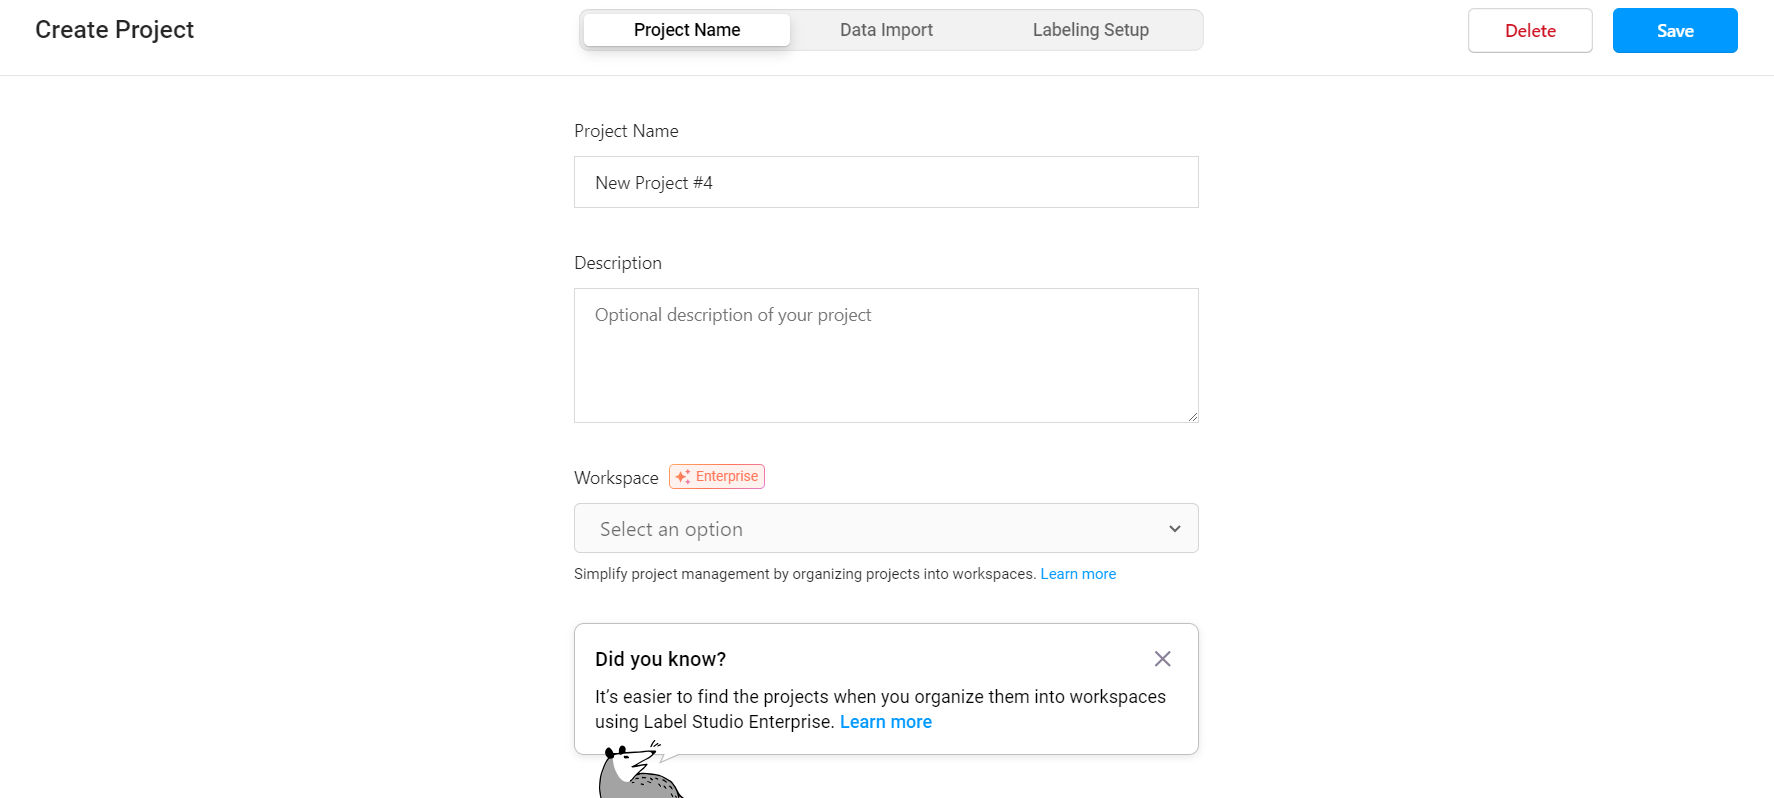

In [ ]:
from IPython.display import Image, display

# display the image
display(Image(filename=file_name))

* We input the project name and proceed by selecting "Data Import." Then, we upload the JSON file generated in the previous section.


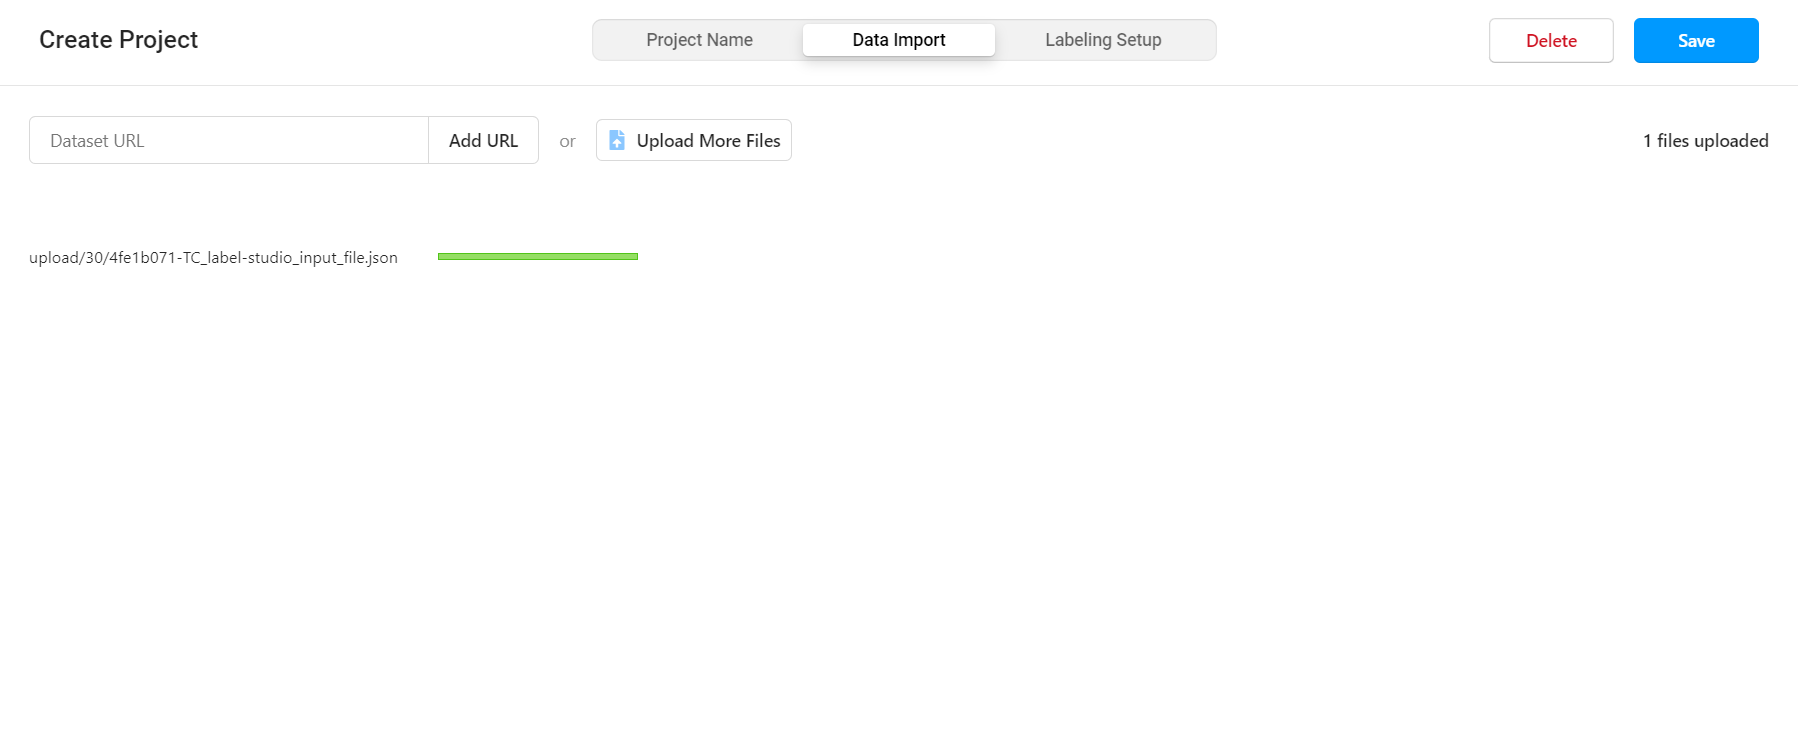

In [ ]:
# display the image
display(Image(filename=file_name))

* We navigate to the "Labeling Setup" Section and choose the Optical Characterr Recognition Format

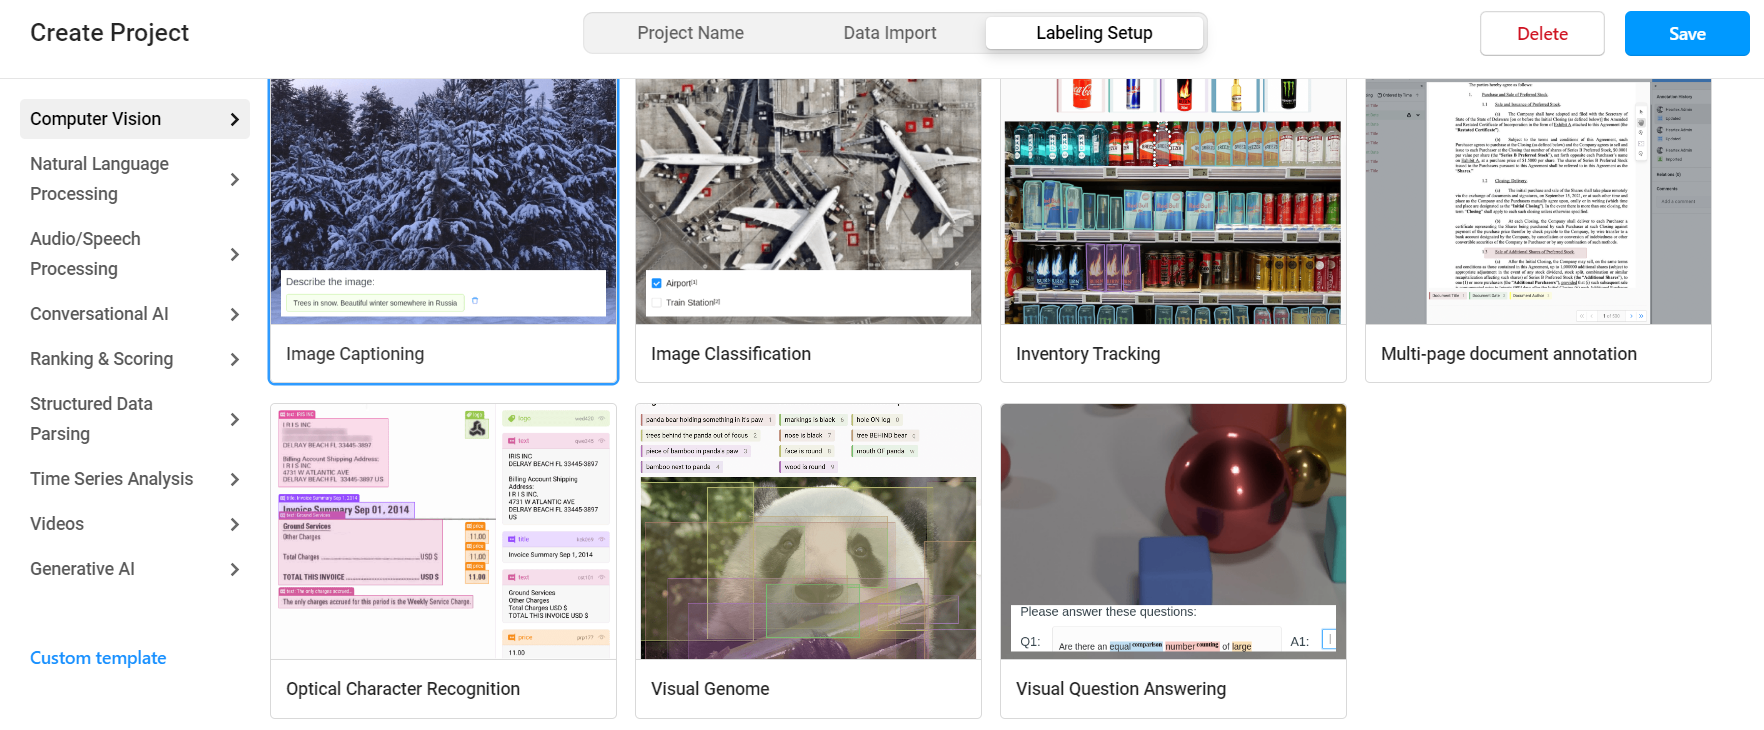

In [ ]:
# display the image
display(Image(filename=file_name))

* After, we add the label names we want, here wehave "price","date" and "other" we click on save.

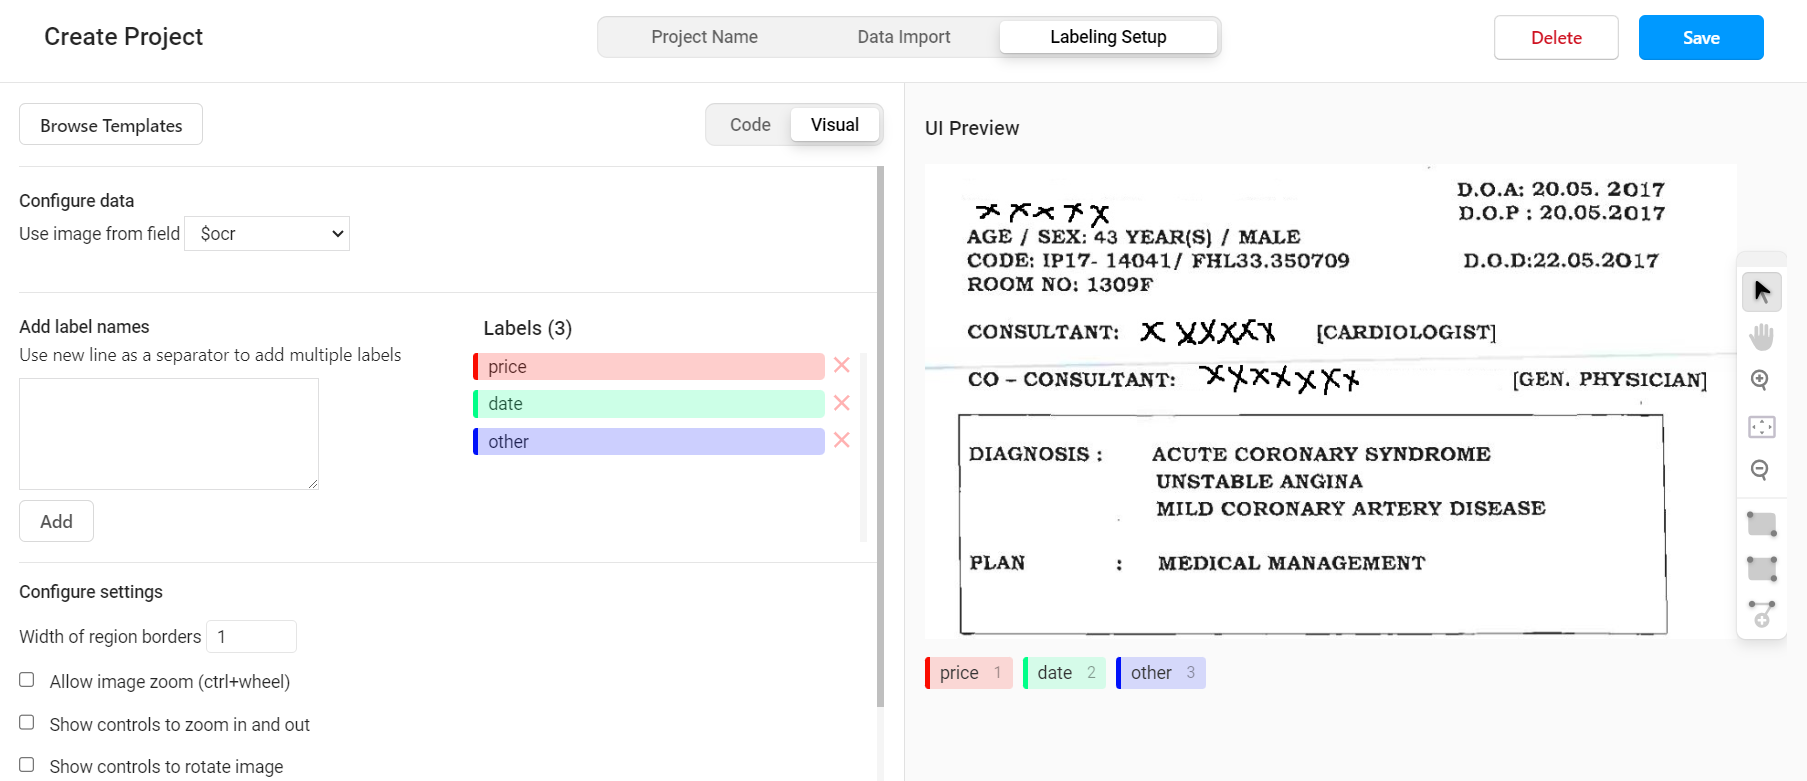

In [ ]:
# display the image
display(Image(filename=file_name))

* Now, we are ready to annotate our images by simply clicking on the  box we want to annotate and then on the label "price", "date" or "other".

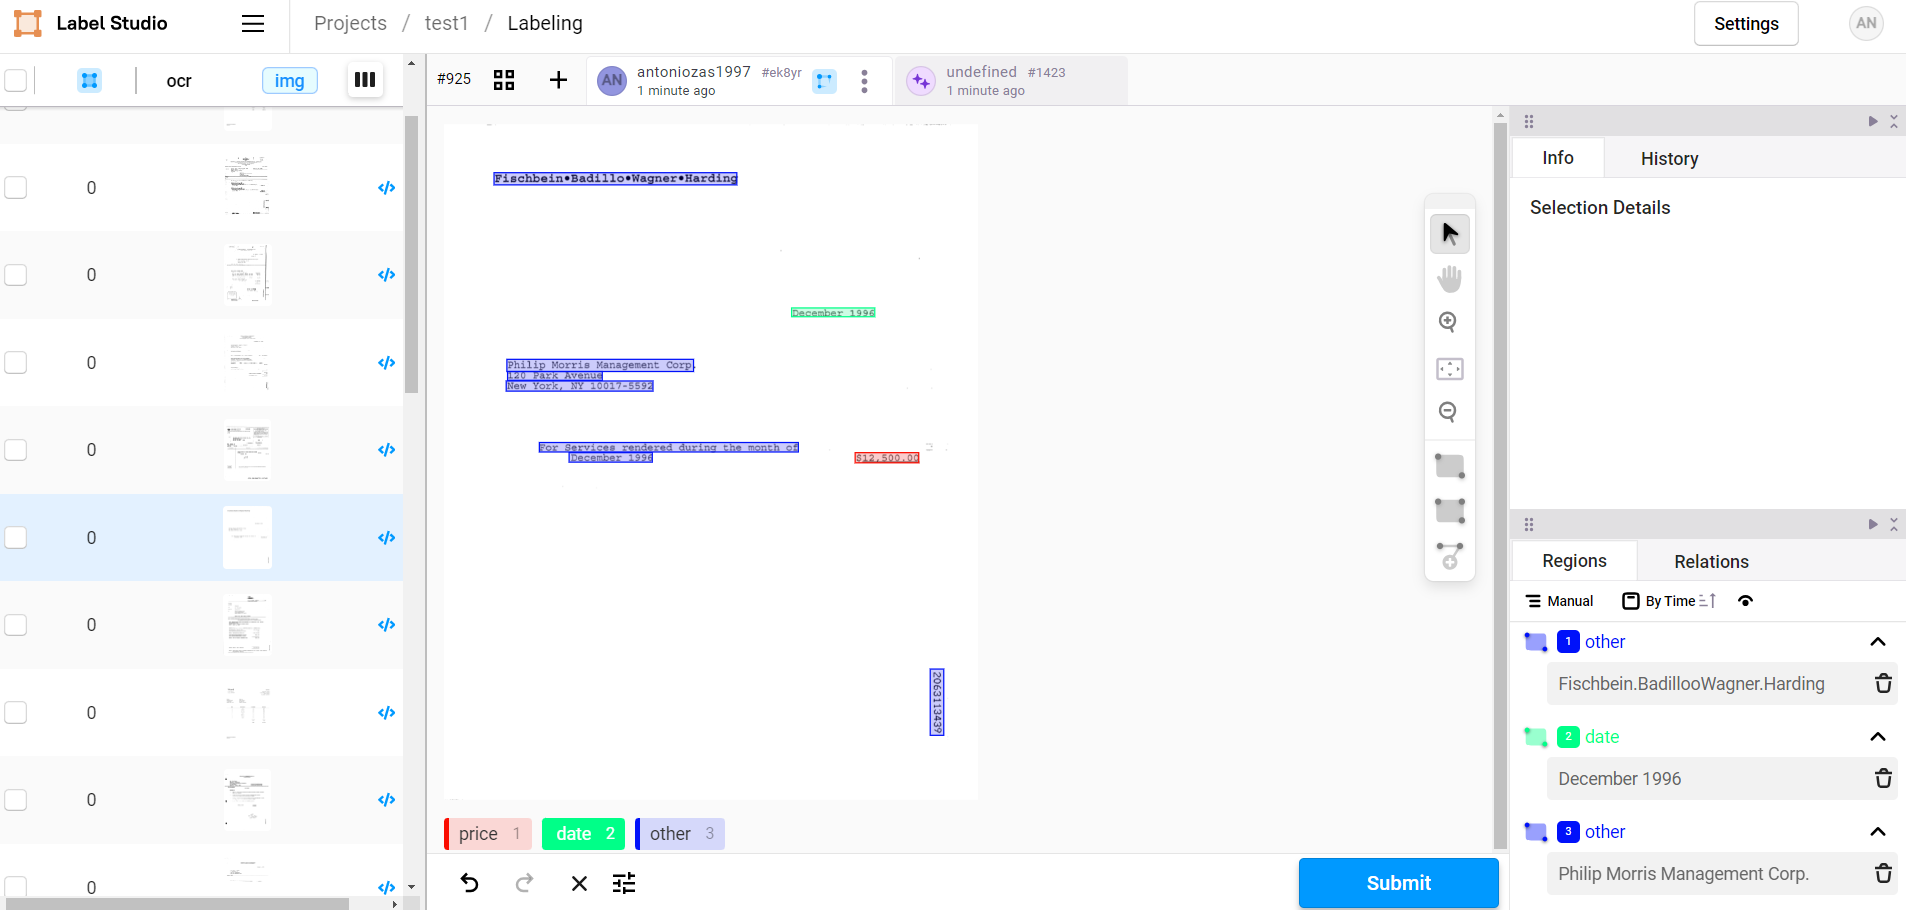

In [ ]:
# display the image
display(Image(filename=file_name))

* After Finishing the Annotation we click in the "Export" button and we choose the JSON-MIN file format

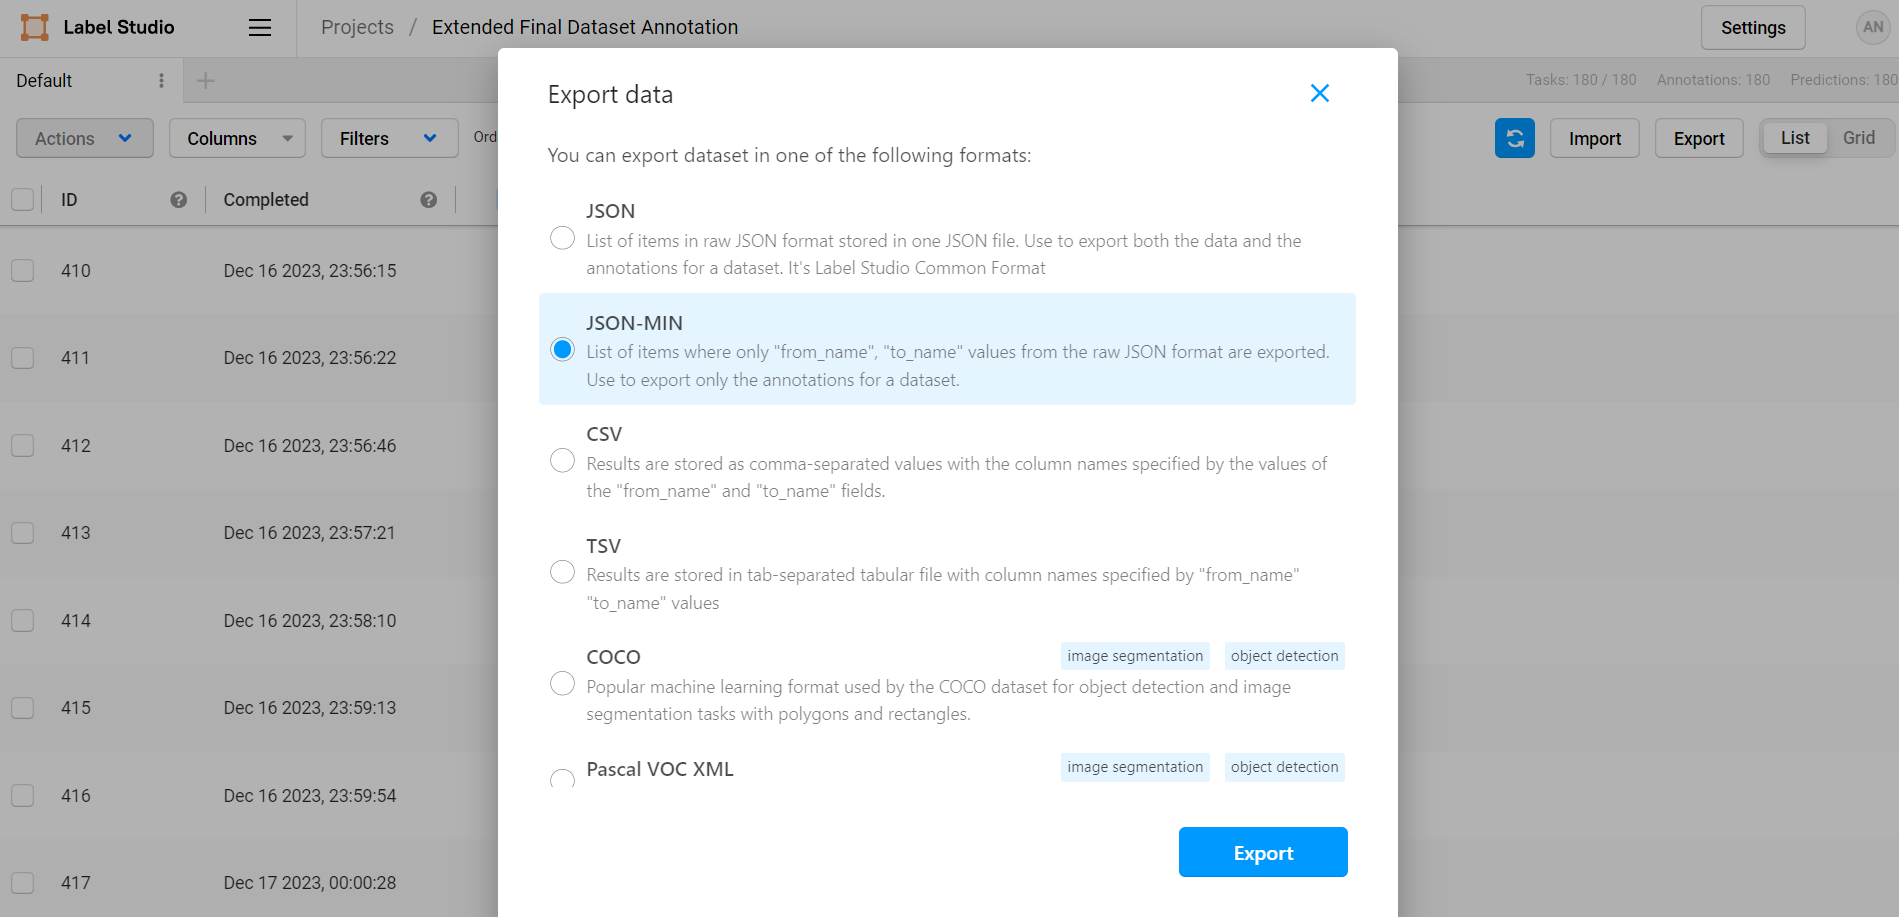

In [ ]:
# display the image
display(Image(filename=file_name))

* Now we save the JSON-MIN file to Google Drive. Its Structure is like this below:

In [ ]:
# create the final path
json_file_path = os.path.join(my_wd, "drive/your_project.json")

# open JSON
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

json_data

Output hidden; open in https://colab.research.google.com to view.

* As we can see on the `labels` there exist the names "Price", "Date", "Other". A model cannot predict such labels, so we should replace these values or with python code or manully using replace after opening the file, we chose the second approach:
1. "Other" --> 0
1. "Price" --> 1
1. "Date" --> 2


* The final structure we want to be like this below

In [ ]:
# the path to JSON file in Google Drive
json_file_path = os.path.join(my_wd,'drive/your_project_after_labels_replacements.json')

# open JSON
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

json_data

Output hidden; open in https://colab.research.google.com to view.